In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [276]:
df = pd.read_csv(r'/Users/admin/Desktop/python/final_project/data/stock prices/stock_prices_sedg.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2017-01-03,12.55,13.200,12.550,13.20,13.20,1123600,Solaredge
1,2017-01-04,13.30,14.450,13.300,14.40,14.40,1363300,Solaredge
2,2017-01-05,14.30,14.575,13.775,13.80,13.80,647700,Solaredge
3,2017-01-06,13.90,14.000,13.600,13.75,13.75,537300,Solaredge
4,2017-01-09,13.70,13.700,13.150,13.50,13.50,733400,Solaredge
5,2017-01-10,13.60,13.775,13.400,13.55,13.55,521200,Solaredge
6,2017-01-11,13.60,13.700,13.350,13.50,13.50,383800,Solaredge
7,2017-01-12,13.55,13.600,13.125,13.50,13.50,750000,Solaredge
8,2017-01-13,13.60,13.800,13.300,13.50,13.50,371400,Solaredge
9,2017-01-17,13.55,14.200,13.500,13.95,13.95,770100,Solaredge


In [277]:
df = df.drop(columns=['company_name'])
df.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,12.55,13.200,12.550,13.20,13.20,1123600
1,2017-01-04,13.30,14.450,13.300,14.40,14.40,1363300
2,2017-01-05,14.30,14.575,13.775,13.80,13.80,647700
3,2017-01-06,13.90,14.000,13.600,13.75,13.75,537300
4,2017-01-09,13.70,13.700,13.150,13.50,13.50,733400
5,2017-01-10,13.60,13.775,13.400,13.55,13.55,521200
6,2017-01-11,13.60,13.700,13.350,13.50,13.50,383800
7,2017-01-12,13.55,13.600,13.125,13.50,13.50,750000
8,2017-01-13,13.60,13.800,13.300,13.50,13.50,371400
9,2017-01-17,13.55,14.200,13.500,13.95,13.95,770100


In [278]:
viz = df.copy()

Data Preparation

In [279]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [280]:
df.shape

(1783, 7)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1783 non-null   object 
 1   Open       1783 non-null   float64
 2   High       1783 non-null   float64
 3   Low        1783 non-null   float64
 4   Close      1783 non-null   float64
 5   Adj Close  1783 non-null   float64
 6   Volume     1783 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 97.6+ KB


In [282]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1783.0,1.544108e+02,1.134392e+02,12.40,45.350000,109.989998,2.729500e+02,3.741000e+02
High,1783.0,1.582997e+02,1.163748e+02,12.65,46.055000,113.019997,2.795400e+02,3.897100e+02
Low,1783.0,1.503506e+02,1.103489e+02,12.25,44.255001,107.415001,2.657450e+02,3.600000e+02
Close,1783.0,1.543395e+02,1.133292e+02,12.30,45.369999,109.790001,2.729150e+02,3.683300e+02
Adj Close,1783.0,1.543395e+02,1.133292e+02,12.30,45.369999,109.790001,2.729150e+02,3.683300e+02
Volume,1783.0,1.135476e+06,1.118551e+06,168000.00,610650.000000,863000.000000,1.260600e+06,2.130420e+07


In [283]:
train, test = train_test_split(df, test_size = 0.2)


In [284]:
test_pred = test.copy()

In [285]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
761,2020-01-13,105.110001,106.139999,102.720001,103.080002,103.080002,875000
668,2019-08-29,83.699997,84.809998,80.550003,83.360001,83.360001,898200
561,2019-03-28,36.790001,37.759998,36.294998,37.759998,37.759998,781000
1335,2022-04-22,254.500000,261.500000,249.845001,251.580002,251.580002,1781700
1554,2023-03-08,328.369995,328.954987,316.529999,324.929993,324.929993,736100
1098,2021-05-14,208.867004,220.539001,207.000000,218.869995,218.869995,756500
197,2017-10-13,28.900000,29.799999,28.555000,29.549999,29.549999,674800
38,2017-02-28,14.950000,15.040000,14.500000,14.650000,14.650000,595300
397,2018-08-01,53.450001,56.700001,53.049999,56.250000,56.250000,1055900
641,2019-07-23,63.700001,63.730000,61.493999,62.450001,62.450001,328700


In [286]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1129,2021-06-29,287.390015,291.179993,281.350006,283.570007,283.570007,774600
701,2019-10-16,84.169998,84.629997,82.919998,83.879997,83.879997,1072800
180,2017-09-20,27.100000,27.150000,26.100000,26.700001,26.700001,709000
126,2017-07-05,20.000000,20.100000,19.250000,19.250000,19.250000,749500
361,2018-06-11,54.450001,55.200001,52.849998,52.900002,52.900002,1365900
217,2017-11-10,38.700001,39.450001,37.750000,38.150002,38.150002,1263700
166,2017-08-30,26.850000,26.950001,26.575001,26.600000,26.600000,584400
726,2019-11-20,79.000000,80.070000,77.606003,78.309998,78.309998,845800
1764,2024-01-08,80.279999,80.339996,78.059998,78.540001,78.540001,3053500
1693,2023-09-26,130.779999,130.779999,126.830002,127.269997,127.269997,2222200


In [287]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [288]:
y_train = train['Close'].values
y_test = test['Close'].values

Linear Regression

In [289]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [290]:
y_pred = model_lnr.predict(x_test)

In [291]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[256.4899662]


Model Evaluation


In [292]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 8.494
RMSE 2.914
MAE 1.756
MAPE 0.011
R2 Score :  0.999


Mean Squared Error (MSE): MSE measures the average of the squares of the errors or deviations. In this case, the MSE value of 8.494 indicates that, on average, the squared difference between the actual and predicted values of the target variable (in this case, stock prices) is approximately 8.494. Since MSE is a measure of error, lower values indicate better performance.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE, providing an interpretable measure of the average magnitude of the errors. An RMSE value of 2.914 indicates that, on average, the model's predictions are approximately 2.914 units away from the actual values. Again, lower values are desirable as they indicate better accuracy.

Mean Absolute Error (MAE): MAE is the average of the absolute differences between the predicted and actual values. The MAE value of 1.756 suggests that, on average, the model's predictions are approximately 1.756 units off from the actual values.

Mean Absolute Percentage Error (MAPE): MAPE measures the percentage difference between the predicted and actual values relative to the actual values. The MAPE value of 0.011, expressed as a percentage, indicates that, on average, the model's predictions deviate by approximately 1.1% from the actual values.

R-squared (R2) Score: R2 score represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). An R2 score of 0.999 suggests that the model explains approximately 99.9% of the variance in the target variable, indicating an excellent fit of the model to the data. However, it's essential to consider potential overfitting when R2 is very close to 1.0.

Overall, the metrics indicate that the model performs exceptionally well in predicting stock prices, with low errors and a high degree of explained variance.

Model Visualization


In [293]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [294]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [295]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2017-01-03,13.200000
2017-01-04,14.400000
2017-01-05,13.800000
2017-01-06,13.750000
2017-01-07,NaN
...,...
2024-01-29,71.250000
2024-01-30,69.160004
2024-01-31,66.500000


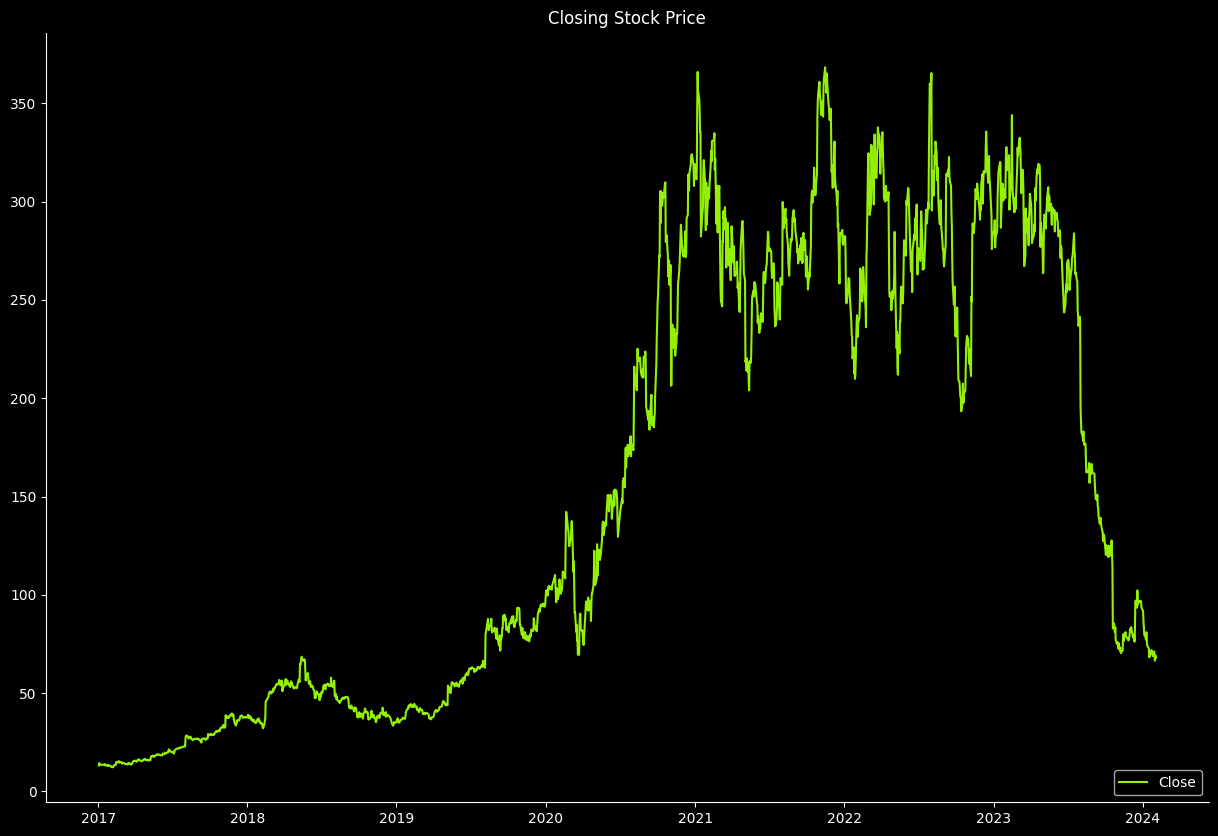

In [296]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

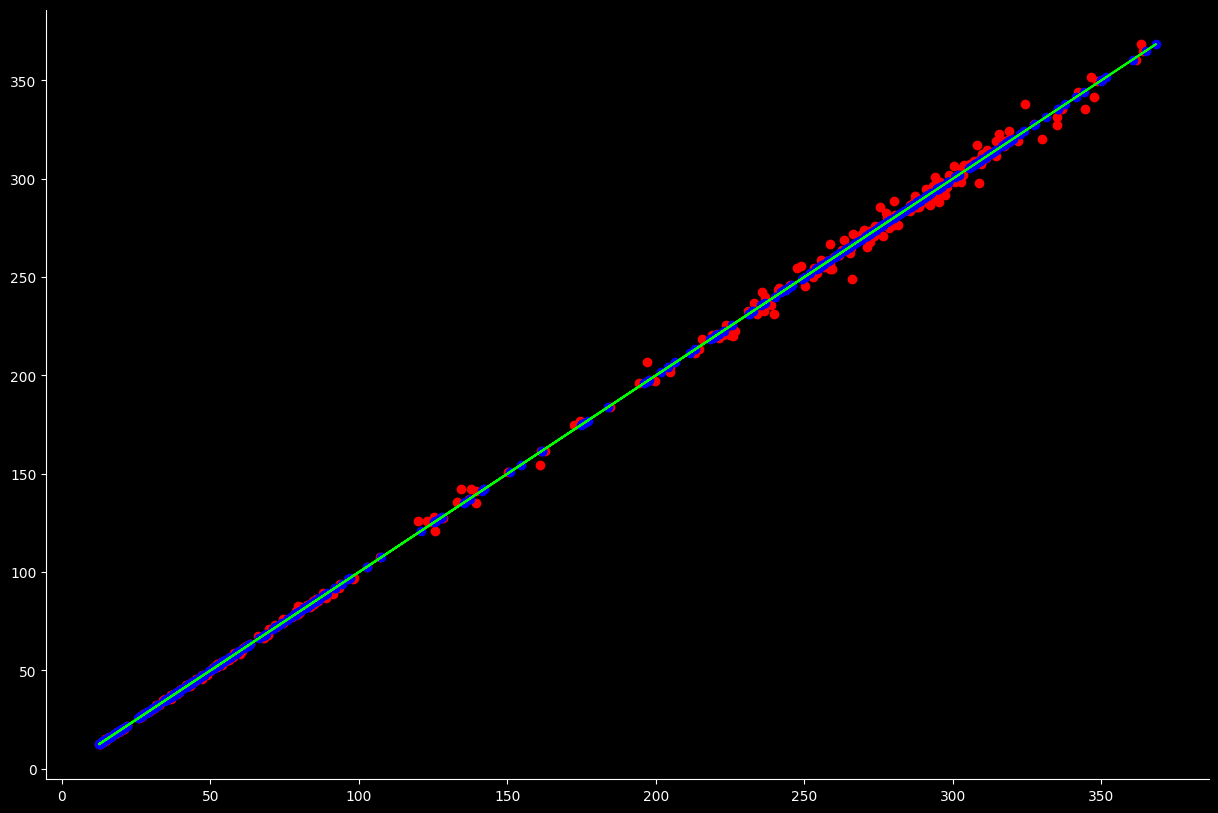

In [297]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [298]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
1129,2021-06-29,287.390015,291.179993,281.350006,283.570007,283.570007,774600,285.659342
701,2019-10-16,84.169998,84.629997,82.919998,83.879997,83.879997,1072800,83.639498
180,2017-09-20,27.100000,27.150000,26.100000,26.700001,26.700001,709000,26.488659
126,2017-07-05,20.000000,20.100000,19.250000,19.250000,19.250000,749500,19.625417
361,2018-06-11,54.450001,55.200001,52.849998,52.900002,52.900002,1365900,53.863085
...,...,...,...,...,...,...,...,...
1418,2022-08-22,294.730011,296.222992,286.299988,288.839996,288.839996,904100,289.282232
495,2018-12-20,35.869999,36.490002,34.049999,35.160000,35.160000,529000,35.071678
1028,2021-02-03,310.000000,312.000000,300.250000,307.079987,307.079987,865000,303.908374
1708,2023-10-17,121.550003,130.380005,121.099998,127.650002,127.650002,2020600,128.196444


In [299]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,357.0,155.727227,116.159422,12.450000,42.750000,107.529999,276.00000,368.329987
Close_Prediction,357.0,155.755917,116.170099,12.567002,43.066288,107.197042,276.40473,363.904224


In [300]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'], format='%Y-%m-%d')
test_pred.set_index('Date', inplace=True)


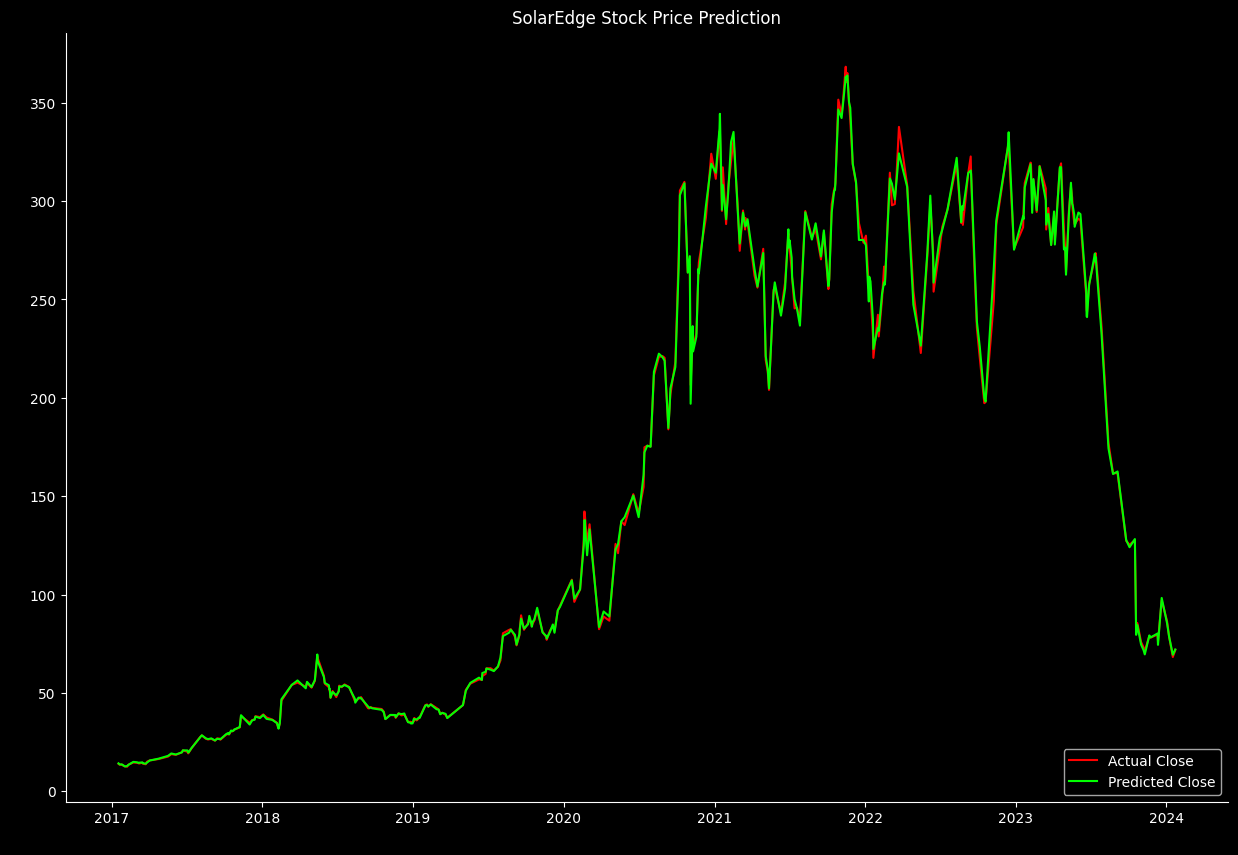

In [304]:
# Sort test_pred DataFrame by date
test_pred_sorted = test_pred.sort_index()

style()
plt.title('SolarEdge Stock Price Prediction', color="white")

# Plotting actual close prices in red
plt.plot(test_pred_sorted.index, test_pred_sorted['Close'], color="red", label="Actual Close")

# Plotting predicted close prices in green
plt.plot(test_pred_sorted.index, test_pred_sorted['Close_Prediction'], color="lime", label="Predicted Close")

plt.legend(loc="lower right", facecolor='black', labelcolor='white')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()
